# Exercise 02: Exploring Fourier Decomposition and Visible Light

## Part 1: Generating a Single Wavelength Light Wave

In [1]:
import numpy as np
import matplotlib.pyplot as plt

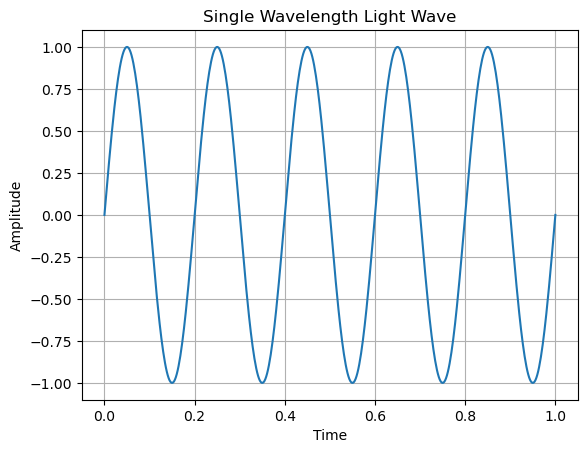

In [2]:
# Define parameters
A = 1  # Amplitude
f = 5  # Frequency
time_start = 0
time_end = 1
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

# Generate the sine wave for a single wavelength
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Questions for Part 1:

1. How many oscillations (peaks) do you see in the plot? What does the frequency ($f=1$) represent? <br>
   **There are 5 oscillations; Frequency indicates the amount of oscillations in one second.**
3. What happens if you increase the frequency to 10? Try changing $f=5$ in the code and re-run the cell. <br>
   **The number of oscillation doubles - from 5 to 10 cycles.**

## Part 2: Reducing Time Axis

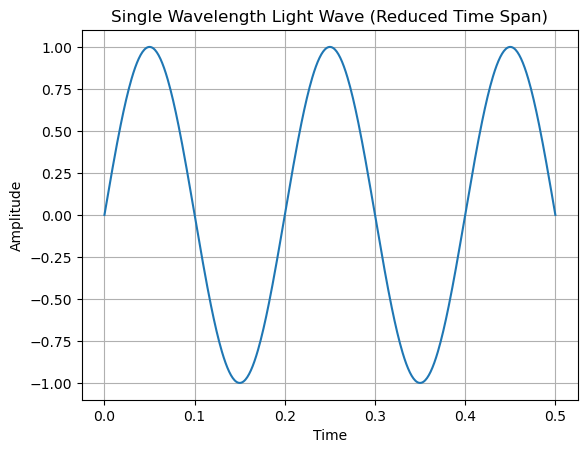

In [3]:
# Adjust the time axis to a shorter range
time_start = 0
time_end = 0.5
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

f = 5  # Frequency

# Generate the sine wave for the same frequency
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave (Reduced Time Span)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()